In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #accuracy measure

import setuptools
import wheel
import scipy
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, ShuffleSplit, GridSearchCV


from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,\
roc_curve,recall_score,classification_report ,f1_score,precision_score

from imblearn.over_sampling import SMOTE, RandomOverSampler,ADASYN
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.ensemble import BalanceCascade
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,\
roc_curve,recall_score,classification_report ,f1_score,precision_score


import math




# Loading Data again

In [53]:
df_train=pd.read_csv('E:\ANALYTICS\DATA SETS\Give me some Loan\cs-training.csv')
df_test=pd.read_csv('E:\ANALYTICS\DATA SETS\Give me some Loan\cs-test.csv')

In [54]:
df_train=df_train[:10000]
df_test=df_test[:2000]
del df_train['Unnamed: 0']
#uneccessary column
del df_test['Unnamed: 0']

In [55]:
df_train.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTime30_59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse':'NumberOfTime60_89DaysPastDueNotWorse'}, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
SeriousDlqin2yrs                        10000 non-null int64
RevolvingUtilizationOfUnsecuredLines    10000 non-null float64
age                                     10000 non-null int64
NumberOfTime30_59DaysPastDueNotWorse    10000 non-null int64
DebtRatio                               10000 non-null float64
MonthlyIncome                           8026 non-null float64
NumberOfOpenCreditLinesAndLoans         10000 non-null int64
NumberOfTimes90DaysLate                 10000 non-null int64
NumberRealEstateLoansOrLines            10000 non-null int64
NumberOfTime60_89DaysPastDueNotWorse    10000 non-null int64
NumberOfDependents                      9716 non-null float64
dtypes: float64(4), int64(7)
memory usage: 859.4 KB


In [56]:
df_null=df_train[df_train['MonthlyIncome'].isnull()]
df_null


#from here we can see that debt ratio where MonthlyIncome is NA has very large values. most probably incorrect. 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
6,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
52,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
58,0,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0
62,0,0.101156,72,0,1720.0,NaN,12,0,2,0,0.0
71,0,0.142013,67,0,1824.0,NaN,7,0,2,0,0.0
86,0,0.360510,58,1,3282.0,NaN,8,0,2,0,0.0


In [57]:
#Deriving values of missing monthly income
df_train_ff=df_train

df_train_ff['MonthlyIncome']=df_train_ff['MonthlyIncome'].fillna(df_train_ff['DebtRatio']/df_train_ff['RevolvingUtilizationOfUnsecuredLines'])

df_train=df_train_ff

df_train.info()

#Still some values if income are NA because Revolvingutilization is 0. The above formula does not apply.


#What about debt ratio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
SeriousDlqin2yrs                        10000 non-null int64
RevolvingUtilizationOfUnsecuredLines    10000 non-null float64
age                                     10000 non-null int64
NumberOfTime30_59DaysPastDueNotWorse    10000 non-null int64
DebtRatio                               10000 non-null float64
MonthlyIncome                           9952 non-null float64
NumberOfOpenCreditLinesAndLoans         10000 non-null int64
NumberOfTimes90DaysLate                 10000 non-null int64
NumberRealEstateLoansOrLines            10000 non-null int64
NumberOfTime60_89DaysPastDueNotWorse    10000 non-null int64
NumberOfDependents                      9716 non-null float64
dtypes: float64(4), int64(7)
memory usage: 859.4 KB


In [58]:
df_train_nn=df_train.loc[((df_train.NumberOfDependents.notnull() & df_train.MonthlyIncome.notnull())),:]
print('Shape Train Data after removing NaN :',df_train_nn.shape)
df_train_nn.info()

('Shape Train Data after removing NaN :', (9683, 11))
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9683 entries, 0 to 9999
Data columns (total 11 columns):
SeriousDlqin2yrs                        9683 non-null int64
RevolvingUtilizationOfUnsecuredLines    9683 non-null float64
age                                     9683 non-null int64
NumberOfTime30_59DaysPastDueNotWorse    9683 non-null int64
DebtRatio                               9683 non-null float64
MonthlyIncome                           9683 non-null float64
NumberOfOpenCreditLinesAndLoans         9683 non-null int64
NumberOfTimes90DaysLate                 9683 non-null int64
NumberRealEstateLoansOrLines            9683 non-null int64
NumberOfTime60_89DaysPastDueNotWorse    9683 non-null int64
NumberOfDependents                      9683 non-null float64
dtypes: float64(4), int64(7)
memory usage: 907.8 KB


In [59]:
#Removing outlier rows for floating type data

df_train_nn_new=df_train_nn

df_train_nn_new=df_train_nn_new[df_train_nn_new.RevolvingUtilizationOfUnsecuredLines < 1.5]
df_train_nn_new=df_train_nn_new[df_train_nn_new.DebtRatio < 4000]
df_train_nn_new=df_train_nn_new[df_train_nn_new.MonthlyIncome < 25000]

df_train_nn=df_train_nn_new
df_train_nn.shape
# Too 

(8912, 11)

In [60]:
#30-59, 60-89, >90 --> these columns have values 98%99 that are incomprehensible. Will remoe the rows. 
df_train_nn_new=df_train_nn
#df_cat ('Categorical Variables :', array(['level_0', 'index', 'SeriousDlqin2yrs', 'age',
     #  'NumberOfTime30_59DaysPastDueNotWorse',
      # 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       #'NumberRealEstateLoansOrLines',
       #'NumberOfTime60_89DaysPastDueNotWorse', 'NumberOfDependents'],
      #dtype=object), '', 10)


df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfTime30_59DaysPastDueNotWorse < 25]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfTime60_89DaysPastDueNotWorse < 25]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfTimes90DaysLate < 25]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberRealEstateLoansOrLines < 6]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfDependents < 6]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfOpenCreditLinesAndLoans < 50]
df_train_nn=df_train_nn_new
df_train_nn.shape

(8834, 11)

In [61]:
df_null=df_train_nn[df_train['MonthlyIncome'].isnull()]
df_null

#As you can see we have eliminated all ouliers.

#1. That had very high debtratio
#2. monthlyincome NA
#3. dependents NA
#4. Extreme/illogical values of some fields

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents


In [62]:
#df_train_nn=df_train_nn[:100000]
#df_train_nn.shape

#df_train_nn = df_train_nn.reset_index()

#splitting df_train_nn into train and test data

df_train_nn_new=df_train_nn
#df_train_test = df_train_nn_new[100000:]
#df_train_nn=df_train_nn_new[:100000]

x=.73*len(df_train_nn_new.index)
x=int(x)
df_train_test = df_train_nn_new.iloc[x:]
df_train_nn_new=df_train_nn_new.iloc[:x]


df_train_test.shape

df_train_nn_new.shape

In [63]:
df_train_nn.shape

(8834, 11)

#Removing NA from df_train_test
# df_train_test=df_train_test.reset_index()
#df_train_test.drop('Index', axis=1)
df_train_test=df_train_test.loc[((df_train_test.SeriousDlqin2yrs.notnull()) &\
                          (df_train_test.RevolvingUtilizationOfUnsecuredLines.notnull()) &\
                          (df_train_test.age.notnull()) &\
                          (df_train_test.NumberOfTime30_59DaysPastDueNotWorse.notnull()) &\
                          (df_train_test.DebtRatio.notnull()) & (df_train_test.MonthlyIncome.notnull()) &\
                          (df_train_test.NumberOfOpenCreditLinesAndLoans.notnull()) &\
                          (df_train_test.NumberOfTimes90DaysLate.notnull()) &\
                          (df_train_test.NumberRealEstateLoansOrLines.notnull()) &\
                          (df_train_test.NumberOfTime60_89DaysPastDueNotWorse.notnull()) &\
                          (df_train_test.NumberOfDependents.notnull())),:]

print('Shape Train Data after removing NaN :',df_train_test.shape)
df_train_test.info()

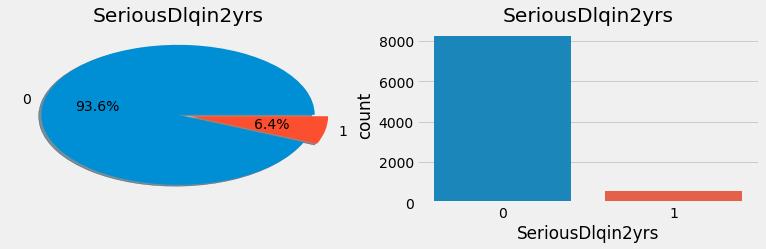

In [64]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train_nn['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('SeriousDlqin2yrs')
ax[0].set_ylabel('')
sns.countplot('SeriousDlqin2yrs',data=df_train_nn,ax=ax[1])
ax[1].set_title('SeriousDlqin2yrs')
plt.show()

f,ax=plt.subplots(1,2,figsize=(12,3))
df_train_nn['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('SeriousDlqin2yrs')
ax[0].set_ylabel('')
sns.countplot('SeriousDlqin2yrs',data=df_train_nn,ax=ax[1])
ax[1].set_title('SeriousDlqin2yrs')
plt.show()

In [65]:
df_train_nn['NumberOfDependents'] = df_train_nn['NumberOfDependents'].astype('int64')
#df_train_test['NumberOfDependents'] = df_train_test['NumberOfDependents'].astype('int64')
#df_train_nn_new['NumberOfDependents'] = df_train_nn_new['NumberOfDependents'].astype('int64')

In [66]:
df_train_nn.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2
10,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0
11,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2
12,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2
13,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2


In [67]:
train_df=df_train_nn
log_trans_list = train_df.columns.values[[1,3,4,5,6,7,8,9,10]]
log_trans_list
for each in log_trans_list:
    train_df[each] = np.log(1+train_df[each].values)

train_df.shape
# log_trans_list
# for each in log_trans_list:
#     train_df[each] = np.log(1+train_df[each].values)

(8834, 11)

train_df_test=df_train_test
log_trans_list = train_df_test.columns.values[[1,3,4,5,6,7,8,9,10]]
log_trans_list
for each in log_trans_list:
    train_df_test[each] = np.log(1+train_df_test[each].values)



train_df_new=df_train_nn_new
log_trans_list_new = train_df_new.columns.values[[1,3,4,5,6,7,8,9,10]]
log_trans_list_new
for each in log_trans_list_new:
    train_df_new[each] = np.log(1+train_df_new[each].values)

train_df_new.shape


df_train_test=train_df_test

11
('SeriousDlqin2yrs', 0, 'r')
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('RevolvingUtilizationOfUnsecuredLines', 1, 'g')
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('age', 2, 'b')
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('NumberOfTime30_59DaysPastDueNotWorse', 3, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('DebtRatio', 4, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('MonthlyIncome', 5, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('NumberOfOpenCreditLinesAndLoans', 6, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('NumberOfTimes90DaysLate', 7, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('NumberRealEstateLoansOrLines', 8, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('NumberOfTime60_89DaysPastDueNotWorse', 9, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('NumberOfDependents', 10, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


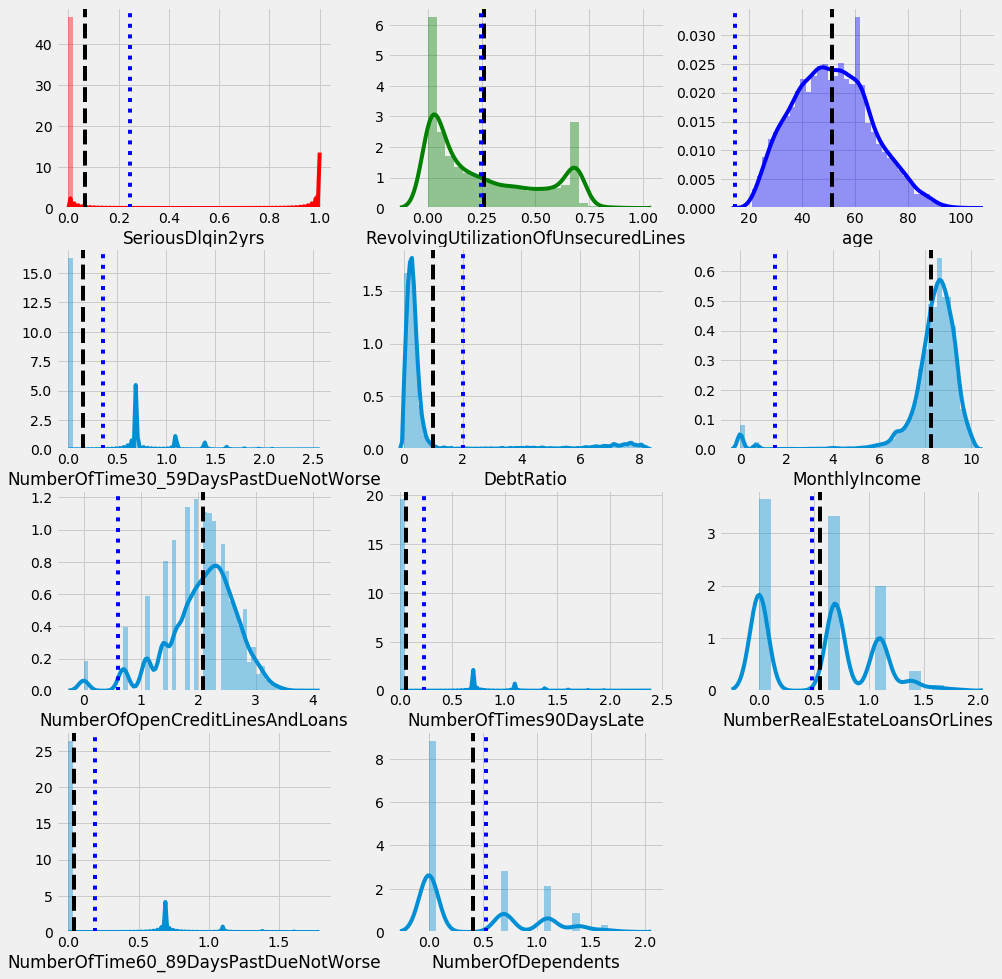

In [68]:
columns = df_train_nn.columns
length  = len(columns)
colors  = ["r","g","b"] 
print(length)
plt.figure(figsize=(15,20))
for i,j,k in itertools.izip_longest(columns,range(length),colors):
    print(i,j,k)
    print(range(length))
    plt.subplot(length/2,length/3,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df_train_nn[i], color=k)
    #sns.boxplot(df_num[i])
    #plt.title(i)
    #plt.subplots_adjust(hspace = .3)
    plt.axvline(train_df[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(train_df[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")

  # Model building using df_train and df_train_test

#df_train_nn=train_df

#breaking training set into dependent and independent vars for training model

Y_df_train=df_train_nn['SeriousDlqin2yrs']
X_df_train=df_train_nn.drop('SeriousDlqin2yrs', axis=1)

#Removing Required column in test data

Y_df_train_test=df_train_test['SeriousDlqin2yrs']
X_df_train_test=df_train_test.drop('SeriousDlqin2yrs', axis=1)

Y_df_train.head()

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_df_train, Y_df_train)
prediction1=logreg.predict(X_df_train_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(Y_df_train_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(Y_df_train_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(Y_df_train_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

svc = SVC()
svc.fit(X_df_train, Y_df_train)
prediction1=svc.predict(X_df_train_test)
print("__"*50,"\n")
print('The accuracy of the svc is',metrics.accuracy_score(Y_df_train_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(Y_df_train_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(Y_df_train_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

grouped_df = train_df.groupby('age')
grouped_df

rfc = RandomForestClassifier()
rfc.fit(X_df_train, Y_df_train)
prediction1=rfc.predict(X_df_train_test)
print("__"*50,"\n")
print('The accuracy of the svc is',metrics.accuracy_score(Y_df_train_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(Y_df_train_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(Y_df_train_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

X = X_df_train
y = Y_df_train

clfLGBM1 = LGBMClassifier(n_estimators=200, nthread=-1, seed=42)
clfLGBM2 = LGBMClassifier(n_estimators=180, nthread=-1, seed=42)


def scoring(clf, X, y):
    fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:, 1])
    roc_auc = auc(fpr, tpr)
    return roc_auc

scores = cross_val_score(n_jobs=-1, cv=3, estimator=clfLGBM1, X=X, y=y, scoring=scoring)
scores

clfLGBM1.fit(X, y)

scoring(clfLGBM1, X, y)

prediction1=clfLGBM1.predict(X_df_train_test)
print("__"*50,"\n")
print('The accuracy of the svc is',metrics.accuracy_score(Y_df_train_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(Y_df_train_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(Y_df_train_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Address Class Imbalance¶


Broadly there are 2 techniques to handle class Imbalance

Resampling

•UnderSampling
•OverSampling 
•SMOTE


Algorithmic Ensemble Techniques

•Bagging
•Boosting
•class_weights='balanced'

We will be evealuating model based on precison , recall & AUCPR(Area under Precision Recall Curve)

X = df_train_nn.drop('SeriousDlqin2yrs', axis=1)
y = df_train_nn['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)
scores = cross_val_score(clfLGBM1, X, y, cv=10, scoring='accuracy')
print(scores)

logreg.predict_proba(X_test)[0:20,:]

y_predict_proba=logreg.predict_proba(X_test)

plt.hist(y_predict_proba,bins=8)
plt.show()

from sklearn.preprocessing import binarize
y_predict_class = binarize(y_predict_proba,0.1)

y_predict_class=y_predict_class[:,1]
y_predict_class

In [69]:
df_train_nn.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
1,0,0.671490,40,0.000000,0.115002,7.863651,1.609438,0.000000,0.000000,0.0,0.693147
2,0,0.505721,38,0.693147,0.081684,8.020599,1.098612,0.693147,0.000000,0.0,0.000000
3,0,0.210107,30,0.000000,0.035415,8.101981,1.791759,0.000000,0.000000,0.0,0.000000
5,0,0.193244,74,0.000000,0.318895,8.160804,1.386294,0.000000,0.693147,0.0,0.693147
7,0,0.562163,39,0.000000,0.190571,8.160804,2.197225,0.000000,0.000000,0.0,0.000000


In [70]:
X = df_train_nn.drop('SeriousDlqin2yrs', axis=1)
y = df_train_nn['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=0)

In [71]:
X_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
8306,0.392197,49,0.000000,0.359816,8.318986,2.079442,0.0,1.098612,0.000000,0.693147
5187,0.177859,78,0.000000,0.659695,7.474772,2.772589,0.0,0.693147,0.000000,0.000000
7207,0.437394,62,0.000000,0.241370,7.919720,2.197225,0.0,0.000000,0.000000,0.000000
332,0.033153,41,0.000000,0.342672,8.779711,2.302585,0.0,0.693147,0.000000,1.098612
240,0.679727,61,0.693147,0.190589,8.612685,2.484907,0.0,0.000000,0.693147,0.693147


('____________________________________________________________________________________________________', '\n')
('The accuracy of the Logistic Regression is', 0.9362950544844929)
('____________________________________________________________________________________________________', '\n')
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2228
           1       0.57      0.16      0.25       158

   micro avg       0.94      0.94      0.94      2386
   macro avg       0.76      0.57      0.61      2386
weighted avg       0.92      0.94      0.92      2386

____________________________________________________________________________________________________


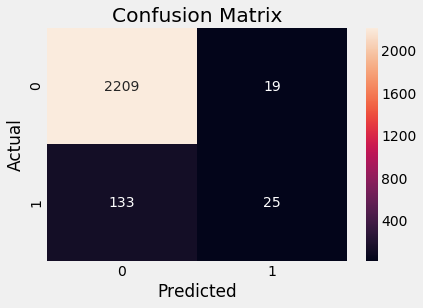

In [72]:
# Logistic Regression - X_train, X_test, y_train, y_test

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction1=logreg.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

('____________________________________________________________________________________________________', '\n')
('The accuracy of the Logistic Regression is', 0.9358759430008382)
('____________________________________________________________________________________________________', '\n')
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2228
           1       0.58      0.12      0.20       158

   micro avg       0.94      0.94      0.94      2386
   macro avg       0.76      0.56      0.58      2386
weighted avg       0.92      0.94      0.92      2386

____________________________________________________________________________________________________


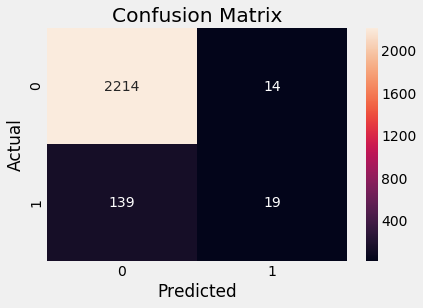

In [73]:
# Random Forest - X_train, X_test, y_train, y_test

rndfor = RandomForestClassifier()
rndfor.fit(X_train, y_train)
prediction1=rndfor.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Grid Search CV - Loss Function 

In [74]:
grid={'C':10.0**np.arange(-2,3), 'penalty':['l1','l2'], 'class_weight': ['balanced']}
cv=KFold(X_train.shape[0], shuffle=True, random_state=0)
clf = GridSearchCV(logreg,grid, cv=10, n_jobs=8, scoring='f1_macro')

clf.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

('____________________________________________________________________________________________________', '\n')
('The accuracy of the Logistic Regression is', 0.8139145012573344)
('____________________________________________________________________________________________________', '\n')
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2228
           1       0.22      0.69      0.33       158

   micro avg       0.81      0.81      0.81      2386
   macro avg       0.60      0.76      0.61      2386
weighted avg       0.92      0.81      0.85      2386

____________________________________________________________________________________________________


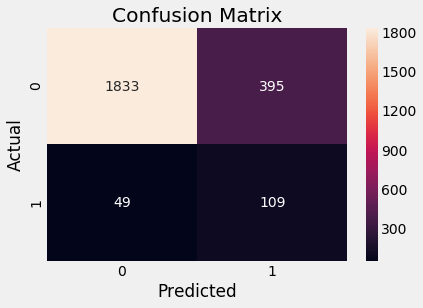

In [75]:
prediction1=clf.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Trying SMOTE - Oversampling

In [47]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
np.bincount(y_train)

array([6040, 6040], dtype=int64)

('____________________________________________________________________________________________________', '\n')
('The accuracy of the Logistic Regression is', 0.7992455993294216)
('____________________________________________________________________________________________________', '\n')
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2228
           1       0.20      0.70      0.32       158

   micro avg       0.80      0.80      0.80      2386
   macro avg       0.59      0.75      0.60      2386
weighted avg       0.92      0.80      0.84      2386

____________________________________________________________________________________________________


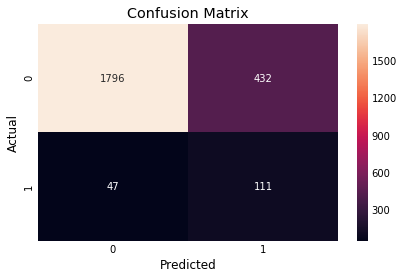

In [28]:
logreg.fit(X_train, y_train)
prediction1=logreg.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
grid={'C':10.0**np.arange(-2,3), 'penalty':['l1','l2'], 'class_weight': ['balanced']}
cv=KFold(X_train.shape[0], shuffle=True, random_state=0)
clf = GridSearchCV(logreg,grid, cv=10, n_jobs=8, scoring='f1_macro')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

('____________________________________________________________________________________________________', '\n')
('The accuracy of the Logistic Regression is', 0.8034367141659682)
('____________________________________________________________________________________________________', '\n')
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      2228
           1       0.21      0.70      0.32       158

   micro avg       0.80      0.80      0.80      2386
   macro avg       0.59      0.76      0.60      2386
weighted avg       0.92      0.80      0.85      2386

____________________________________________________________________________________________________


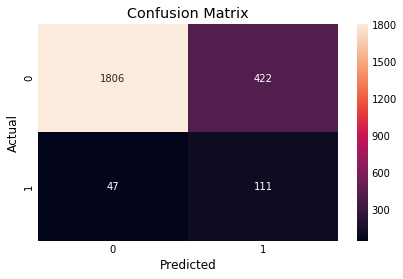

In [30]:
prediction1=clf.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Trying Nearmiss - Undersampling

In [45]:
nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)
np.bincount(y_train)

array([6040, 6040], dtype=int64)

('____________________________________________________________________________________________________', '\n')
('The accuracy of the Logistic Regression is', 0.7992455993294216)
('____________________________________________________________________________________________________', '\n')
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2228
           1       0.20      0.70      0.32       158

   micro avg       0.80      0.80      0.80      2386
   macro avg       0.59      0.75      0.60      2386
weighted avg       0.92      0.80      0.84      2386

____________________________________________________________________________________________________


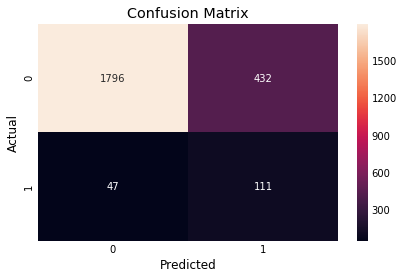

In [34]:
logreg.fit(X_train, y_train)
prediction1=logreg.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#We can see some improvement in the confusion matric on using SMOTE or nearmiss compared to the loss function prection without oversampling/undersampling

# Feature Importance

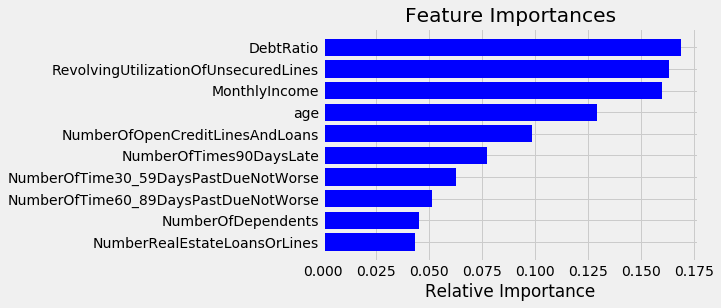

In [77]:
importances = rndfor.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [80]:
X = df_train_nn.drop('SeriousDlqin2yrs', axis=1)
X = X.drop('NumberOfDependents', axis=1)
X = X.drop('NumberRealEstateLoansOrLines', axis=1)
y = df_train_nn['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=0)

('____________________________________________________________________________________________________', '\n')
('The accuracy of the Logistic Regression is', 0.9321039396479464)
('____________________________________________________________________________________________________', '\n')
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2228
           1       0.45      0.11      0.18       158

   micro avg       0.93      0.93      0.93      2386
   macro avg       0.70      0.55      0.57      2386
weighted avg       0.91      0.93      0.91      2386

____________________________________________________________________________________________________


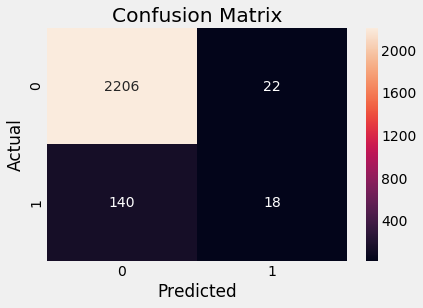

In [81]:
# Random Forest - X_train, X_test, y_train, y_test

rndfor = RandomForestClassifier()
rndfor.fit(X_train, y_train)
prediction1=rndfor.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [130]:
X_train.leng

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [82]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
np.bincount(y_train)

array([6040, 6040], dtype=int64)

('____________________________________________________________________________________________________', '\n')
('The accuracy of the Logistic Regression is', 0.9124056999161777)
('____________________________________________________________________________________________________', '\n')
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2228
           1       0.31      0.26      0.28       158

   micro avg       0.91      0.91      0.91      2386
   macro avg       0.63      0.61      0.62      2386
weighted avg       0.91      0.91      0.91      2386

____________________________________________________________________________________________________


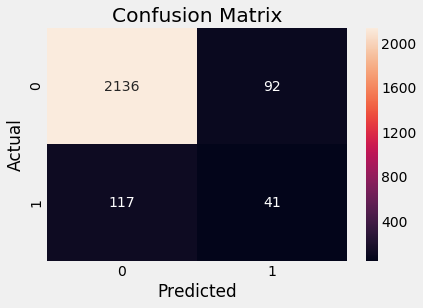

In [83]:
rndfor.fit(X_train, y_train)
prediction1=rndfor.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Reducing the features using feature importance did not help me much. 

# ADA boost with logistic regression

In [120]:
seed = 7
num_trees = 30
kfold = KFold(n_splits=10, random_state=seed)
clf = AdaBoostClassifier(logreg, n_estimators=num_trees, random_state=seed)

clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=30, random_state=7)

('____________________________________________________________________________________________________', '\n')
('The accuracy of the Logistic Regression is', 0.8101424979044426)
('____________________________________________________________________________________________________', '\n')
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2228
           1       0.21      0.68      0.32       158

   micro avg       0.81      0.81      0.81      2386
   macro avg       0.59      0.75      0.61      2386
weighted avg       0.92      0.81      0.85      2386

____________________________________________________________________________________________________


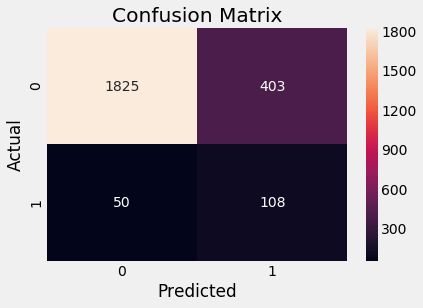

In [121]:
prediction1=clf.predict(X_test)
print("__"*50,"\n")
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test,prediction1))
print("__"*50,"\n")
#acc_log = round(logreg.score(X_df_train, Y_df_train) * 100, 2)
#acc_log
print(classification_report(y_test,prediction1))
print("__"*50)
sns.heatmap(confusion_matrix(y_test,prediction1),annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [126]:
ABC.get_params().keys()

['base_estimator__tol',
 'base_estimator__solver',
 'base_estimator',
 'n_estimators',
 'base_estimator__n_jobs',
 'algorithm',
 'base_estimator__multi_class',
 'base_estimator__penalty',
 'base_estimator__intercept_scaling',
 'base_estimator__dual',
 'base_estimator__fit_intercept',
 'learning_rate',
 'base_estimator__max_iter',
 'random_state',
 'base_estimator__class_weight',
 'base_estimator__warm_start',
 'base_estimator__verbose',
 'base_estimator__C',
 'base_estimator__random_state']

In [ ]:
#

In [125]:
seed = 7
num_trees = 30
kfold = KFold(n_splits=10, random_state=seed)
grid={'C':10.0**np.arange(-2,3), 'penalty':['l1','l2'], 'class_weight': ['balanced']}

ABC = AdaBoostClassifier(logreg, n_estimators=num_trees, random_state=seed)
clf = GridSearchCV(ABC,grid, cv=2, n_jobs=8, scoring='f1_macro')

clf.fit(X_train, y_train)


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\Users\Admin\Anaconda2\lib\threading.py", line 801, in __bootstrap_inner
    self.run()
  File "C:\Users\Admin\Anaconda2\lib\threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\externals\joblib\externals\loky\backend\queues.py", line 175, in _feed
    onerror(e, obj)
  File "C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py", line 310, in _on_queue_feeder_error
    self.thread_wakeup.wakeup()
  File "C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py", line 153, in wakeup
    self._writer.send_bytes(b"0")
IOError: [Errno 6] The handle is invalid



JoblibValueError: JoblibValueError
___________________________________________________________________________
...........................................................................
C:\Users\Admin\Anaconda2\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = r'C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
C:\Users\Admin\Anaconda2\lib\runpy.py in _run_code(code=<code object <module> at 00000000025D0D30, file ...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\Adm...onda2\lib\site-packages\ipykernel\kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname=r'C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 00000000025D0D30, file ...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\Adm...onda2\lib\site-packages\ipykernel\kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
   1068                 self._events.update(event_pairs)
   1069                 while self._events:
   1070                     fd, events = self._events.popitem()
   1071                     try:
   1072                         fd_obj, handler_func = self._handlers[fd]
-> 1073                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
   1074                     except (OSError, IOError) as e:
   1075                         if errno_from_exception(e) == errno.EPIPE:
   1076                             # Happens when the client closes the connection
   1077                             pass

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"seed = 7\nnum_trees = 30\nkfold = KFold(n_spli...oring='f1_macro')\n\nclf.fit(X_train, y_train)\n", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2019, 3, 18, 15, 2, 32, 222000, tzinfo=tzutc()), u'msg_id': u'e16050c414e94250a909cc9aff0bda23', u'msg_type': u'execute_request', u'session': u'e3455d4edd134f8f88154b880388523b', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'e16050c414e94250a909cc9aff0bda23', 'msg_type': u'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['e3455d4edd134f8f88154b880388523b']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u"seed = 7\nnum_trees = 30\nkfold = KFold(n_spli...oring='f1_macro')\n\nclf.fit(X_train, y_train)\n", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2019, 3, 18, 15, 2, 32, 222000, tzinfo=tzutc()), u'msg_id': u'e16050c414e94250a909cc9aff0bda23', u'msg_type': u'execute_request', u'session': u'e3455d4edd134f8f88154b880388523b', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'e16050c414e94250a909cc9aff0bda23', 'msg_type': u'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['e3455d4edd134f8f88154b880388523b'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"seed = 7\nnum_trees = 30\nkfold = KFold(n_spli...oring='f1_macro')\n\nclf.fit(X_train, y_train)\n", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2019, 3, 18, 15, 2, 32, 222000, tzinfo=tzutc()), u'msg_id': u'e16050c414e94250a909cc9aff0bda23', u'msg_type': u'execute_request', u'session': u'e3455d4edd134f8f88154b880388523b', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'e16050c414e94250a909cc9aff0bda23', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u"seed = 7\nnum_trees = 30\nkfold = KFold(n_spli...oring='f1_macro')\n\nclf.fit(X_train, y_train)\n", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u"seed = 7\nnum_trees = 30\nkfold = KFold(n_spli...oring='f1_macro')\n\nclf.fit(X_train, y_train)\n"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u"seed = 7\nnum_trees = 30\nkfold = KFold(n_spli...oring='f1_macro')\n\nclf.fit(X_train, y_train)\n",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u"seed = 7\nnum_trees = 30\nkfold = KFold(n_spli...oring='f1_macro')\n\nclf.fit(X_train, y_train)\n",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u"seed = 7\nnum_trees = 30\nkfold = KFold(n_spli...oring='f1_macro')\n\nclf.fit(X_train, y_train)\n", store_history=True, silent=False, shell_futures=True)
   2709                 self.displayhook.exec_result = result
   2710 
   2711                 # Execute the user code
   2712                 interactivity = "none" if silent else self.ast_node_interactivity
   2713                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2714                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2715                 
   2716                 self.last_execution_succeeded = not has_raised
   2717 
   2718                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-125-a6bca5c9ef61>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at d8b9278, execution_co..._before_exec=None error_in_exec=None result=None>)
   2819                     return True
   2820 
   2821             for i, node in enumerate(to_run_interactive):
   2822                 mod = ast.Interactive([node])
   2823                 code = compiler(mod, cell_name, "single")
-> 2824                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 000000000D6536B0, file "<ipython-input-125-a6bca5c9ef61>", line 9>
        result = <ExecutionResult object at d8b9278, execution_co..._before_exec=None error_in_exec=None result=None>
   2825                     return True
   2826 
   2827             # Flush softspace
   2828             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 000000000D6536B0, file "<ipython-input-125-a6bca5c9ef61>", line 9>, result=<ExecutionResult object at d8b9278, execution_co..._before_exec=None error_in_exec=None result=None>)
   2873         outflag = 1  # happens in more places, so it's easier as default
   2874         try:
   2875             try:
   2876                 self.hooks.pre_run_code_hook()
   2877                 #rprint('Running code', repr(code_obj)) # dbg
-> 2878                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 000000000D6536B0, file "<ipython-input-125-a6bca5c9ef61>", line 9>
        self.user_global_ns = {'ABC': AdaBoostClassifier(algorithm='SAMME.R',
        ...arning_rate=1.0, n_estimators=30, random_state=7), 'ADASYN': <class 'imblearn.over_sampling._adasyn.ADASYN'>, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BalanceCascade': <class 'imblearn.ensemble._balance_cascade.BalanceCascade'>, 'ClusterCentroids': <class 'imblearn.under_sampling._prototype_generation._cluster_centroids.ClusterCentroids'>, 'DTC': DecisionTreeClassifier(class_weight='auto', crit...se, random_state=11,
            splitter='best'), 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, ...}
        self.user_ns = {'ABC': AdaBoostClassifier(algorithm='SAMME.R',
        ...arning_rate=1.0, n_estimators=30, random_state=7), 'ADASYN': <class 'imblearn.over_sampling._adasyn.ADASYN'>, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BalanceCascade': <class 'imblearn.ensemble._balance_cascade.BalanceCascade'>, 'ClusterCentroids': <class 'imblearn.under_sampling._prototype_generation._cluster_centroids.ClusterCentroids'>, 'DTC': DecisionTreeClassifier(class_weight='auto', crit...se, random_state=11,
            splitter='best'), 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, ...}
   2879             finally:
   2880                 # Reset our crash handler in place
   2881                 sys.excepthook = old_excepthook
   2882         except SystemExit as e:

...........................................................................
E:\ANALYTICS\Python\Give me loan\<ipython-input-125-a6bca5c9ef61> in <module>()
      4 grid={'C':10.0**np.arange(-2,3), 'penalty':['l1','l2'], 'class_weight': ['balanced']}
      5 
      6 ABC = AdaBoostClassifier(logreg, n_estimators=num_trees, random_state=seed)
      7 clf = GridSearchCV(ABC,grid, cv=2, n_jobs=8, scoring='f1_macro')
      8 
----> 9 clf.fit(X_train, y_train)

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=2, error_score='raise-deprecatin...ore='warn',
       scoring='f1_macro', verbose=0), X=array([[ 0.5394332 , 39.        ,  0.        , ....  2.39789527,
         0.        ,  0.22547607]]), y=array([0, 0, 0, ..., 1, 1, 1], dtype=int64), groups=None, **fit_params={})
    717                 # instead of results_container
    718                 results_container[0] = self._format_results(
    719                     all_candidate_params, scorers, n_splits, all_out)
    720                 return results_container[0]
    721 
--> 722             self._run_search(evaluate_candidates)
        self._run_search = <bound method GridSearchCV._run_search of GridSe...re='warn',
       scoring='f1_macro', verbose=0)>
        evaluate_candidates = <function evaluate_candidates>
    723 
    724         results = results_container[0]
    725 
    726         # For multi-metric evaluation, store the best_index_, best_params_ and

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py in _run_search(self=GridSearchCV(cv=2, error_score='raise-deprecatin...ore='warn',
       scoring='f1_macro', verbose=0), evaluate_candidates=<function evaluate_candidates>)
   1186         self.param_grid = param_grid
   1187         _check_param_grid(param_grid)
   1188 
   1189     def _run_search(self, evaluate_candidates):
   1190         """Search all candidates in param_grid"""
-> 1191         evaluate_candidates(ParameterGrid(self.param_grid))
        evaluate_candidates = <function evaluate_candidates>
        self.param_grid = {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'class_weight': ['balanced'], 'penalty': ['l1', 'l2']}
   1192 
   1193 
   1194 class RandomizedSearchCV(BaseSearchCV):
   1195     """Randomized search on hyper parameters.

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py in evaluate_candidates(candidate_params=[{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}, {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}, {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}, {'C': 10.0, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 10.0, 'class_weight': 'balanced', 'penalty': 'l2'}, {'C': 100.0, 'class_weight': 'balanced', 'penalty': 'l1'}, {'C': 100.0, 'class_weight': 'balanced', 'penalty': 'l2'}])
    706                                                        train=train, test=test,
    707                                                        parameters=parameters,
    708                                                        **fit_and_score_kwargs)
    709                                for parameters, (train, test)
    710                                in product(candidate_params,
--> 711                                           cv.split(X, y, groups)))
    712 
    713                 all_candidate_params.extend(candidate_params)
    714                 all_out.extend(out)
    715 

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=8), iterable=<generator object <genexpr>>)
    925                 # No need to wait for async callbacks to trigger to
    926                 # consumption.
    927                 self._iterating = False
    928 
    929             with self._backend.retrieval_context():
--> 930                 self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=8)>
    931             # Make sure that we get a last message telling us we are done
    932             elapsed_time = time.time() - self._start_time
    933             self._print('Done %3i out of %3i | elapsed: %s finished',
    934                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Joblib worker traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Mar 18 20:32:32 2019
PID: 4212                Python 2.7.15: C:\Users\Admin\Anaconda2\python.exe
...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    220     def __call__(self):
    221         # Set the default nested backend to self._backend but do not set the
    222         # change the default number of processes to -1
    223         with parallel_backend(self._backend, n_jobs=self._n_jobs):
    224             return [func(*args, **kwargs)
--> 225                     for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (AdaBoostClassifier(algorithm='SAMME.R',
        ...arning_rate=1.0, n_estimators=30, random_state=7), array([[ 0.5394332 , 39.        ,  0.        , ....  2.39789527,
         0.        ,  0.22547607]]), array([0, 0, 0, ..., 1, 1, 1], dtype=int64))
        kwargs = {'error_score': 'raise-deprecating', 'fit_params': {}, 'parameters': {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn', 'scorer': {'score': make_scorer(f1_score, average=macro, pos_label=None)}, 'test': array([   0,    1,    2, ..., 9057, 9058, 9059], dtype=int64), 'train': array([ 3220,  3221,  3222, ..., 12077, 12078, 12079], dtype=int64), ...}
        self.items = [(<function _fit_and_score>, (AdaBoostClassifier(algorithm='SAMME.R',
        ...arning_rate=1.0, n_estimators=30, random_state=7), array([[ 0.5394332 , 39.        ,  0.        , ....  2.39789527,
         0.        ,  0.22547607]]), array([0, 0, 0, ..., 1, 1, 1], dtype=int64)), {'error_score': 'raise-deprecating', 'fit_params': {}, 'parameters': {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn', 'scorer': {'score': make_scorer(f1_score, average=macro, pos_label=None)}, 'test': array([   0,    1,    2, ..., 9057, 9058, 9059], dtype=int64), 'train': array([ 3220,  3221,  3222, ..., 12077, 12078, 12079], dtype=int64), ...})]
    226 
    227     def __len__(self):
    228         return self._size
    229 

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=AdaBoostClassifier(algorithm='SAMME.R',
        ...arning_rate=1.0, n_estimators=30, random_state=7), X=array([[ 0.5394332 , 39.        ,  0.        , ....  2.39789527,
         0.        ,  0.22547607]]), y=array([0, 0, 0, ..., 1, 1, 1], dtype=int64), scorer={'score': make_scorer(f1_score, average=macro, pos_label=None)}, train=array([ 3220,  3221,  3222, ..., 12077, 12078, 12079], dtype=int64), test=array([   0,    1,    2, ..., 9057, 9058, 9059], dtype=int64), verbose=0, parameters={'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, return_estimator=False, error_score='raise-deprecating')
    509     fit_params = dict([(k, _index_param_value(X, v, train))
    510                       for k, v in fit_params.items()])
    511 
    512     train_scores = {}
    513     if parameters is not None:
--> 514         estimator.set_params(**parameters)
        estimator.set_params = <bound method AdaBoostClassifier.set_params of A...rning_rate=1.0, n_estimators=30, random_state=7)>
        parameters = {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
    515 
    516     start_time = time.time()
    517 
    518     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\base.py in set_params(self=AdaBoostClassifier(algorithm='SAMME.R',
        ...arning_rate=1.0, n_estimators=30, random_state=7), **params={'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'})
    208             key, delim, sub_key = key.partition('__')
    209             if key not in valid_params:
    210                 raise ValueError('Invalid parameter %s for estimator %s. '
    211                                  'Check the list of available parameters '
    212                                  'with `estimator.get_params().keys()`.' %
--> 213                                  (key, self))
        key = 'penalty'
        self = AdaBoostClassifier(algorithm='SAMME.R',
        ...arning_rate=1.0, n_estimators=30, random_state=7)
    214 
    215             if delim:
    216                 nested_params[key][sub_key] = value
    217             else:

ValueError: Invalid parameter penalty for estimator AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=30, random_state=7). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________